<hr>

# Prediction : Breast Cancer Data(Using ROC AUC and Threshold) 

Basic Machine Learning for Medical Informatics

This solution using ROC AUC and Threshold to predict model

and this model using only 2 features

![alt text](https://editor.analyticsvidhya.com/uploads/70456have%20cancer.jpg)

<hr>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [2]:
# use data and feature_names

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target # Class/Target/Label (เป็นหรือไม่เป็นมะเร็ง)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.shape

(569, 31)

In [5]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [3]:
# explore NaN

df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

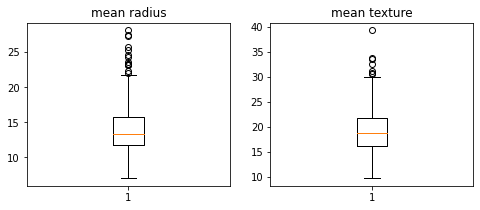

In [6]:
# to check Outlier

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3)) # plot 2 graph ax1, ax2


ax1.set_title('mean radius')
ax1.boxplot(df['mean radius'])

ax2.set_title('mean texture')
ax2.boxplot(df['mean texture'])
plt.show()

In [8]:
# use 2 features (mean radius), (mean texture)


# delete Outliers 

df = df[df['mean radius'] < 25]
df = df[df['mean texture'] < 38]
df.shape

(563, 31)

In [9]:
df['mean ra'] = df['mean radius']

* Data Viusalization 

สำรวจข้อมูล (exploratory data by using scatter plot)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


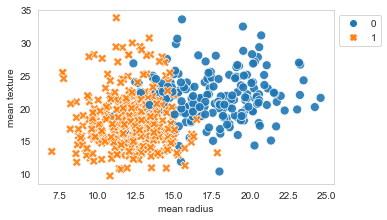

In [10]:
# ดูความสัมพันธ์ของ 2 ตัวแปร

sns.set_style('whitegrid') # define color of graph area 'White'
plt.figure(figsize=(5.3, 3.2)) # graph size

sns.scatterplot('mean radius', 'mean texture', data = df, hue = 'class', style='class',
               alpha = 0.9, edgecolor = 'w', s = 80)

plt.grid(False)
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


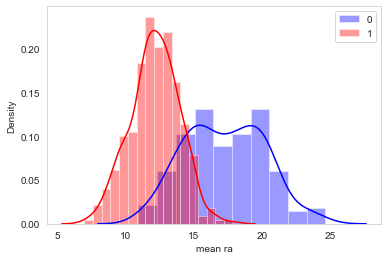

In [11]:
# plot Histrogram หรือ ดูการกระจายด้วย Displot

sns.distplot(df['mean ra'][df['class']==0], label='0', color='b')
sns.distplot(df['mean ra'][df['class']==1], label='1', color='r')
plt.legend()
plt.grid(False)
plt.show()

In [12]:
# Let mean ra raplace mean radius
columns = ['mean ra', 'mean texture'] # mean ra ใช้แทน mean radius

# X is Features for Train Test
X = df[columns] 

# y is Class/Target
y = df['class'] 


# check row, columns and y data
X.shape, y.shape, y.unique() 

((563, 2), (563,), array([0, 1]))

In [13]:
# check some X data

X[:3]

,mean ra,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25


* Data Preprocessing

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

print("Score {:.3f}".format(model.score(X_test, y_test)))

# y_pred = model.predict(X_test) # if u using this, Threshold will equal 0.5


threshold = .34 # less thresold its will get fastest result
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred = y_pred_proba > threshold # Predict = 1 if confident interval is higher than


print(classification_report(y_test, y_pred, target_names=['No','Yes']))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Score 0.911
              precision    recall  f1-score   support

          No       1.00      0.76      0.86        63
         Yes       0.88      1.00      0.93       106

    accuracy                           0.91       169
   macro avg       0.94      0.88      0.90       169
weighted avg       0.92      0.91      0.91       169

[[ 48  15]
 [  0 106]]


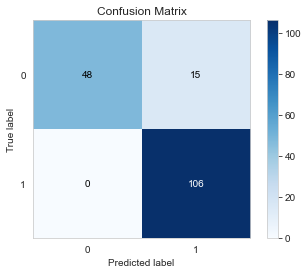

In [18]:
# use scikit plot to see confusion_matrix

import scikitplot as skplot
#sns.set(rc={'figure.figsize':(2,2,2)})
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

* Test by using Cross Validation to check performance

In [20]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(solver = 'lbfgs')
cvs = cross_val_score(model, X, y, cv=10)
print('cross val socres {}'.format(cvs.round(2)))
print('Average(%) = {:.2f}'.format(cvs.mean()*100))

cross val socres [0.84 0.86 0.89 0.86 0.88 0.88 0.95 0.93 0.93 0.86]
Average(%) = 88.64


* ROC Curve 

try to plot ROC Curve and find AUC 

In [21]:
# Train 

model.fit(X_train, y_train)

# Predict by using .predict_proba()
y_pred_prob = model.predict_proba(X_test)

# to see threshold from ROC plot 
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred, y_pred_prob[:,1])

# to see data from using y_pred_prob
y_pred_prob[:10].round(3)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass pos_label=[7.75140179e-01 9.87068166e-01 2.17643703e-02 9.67353285e-01
 1.91371594e-03 1.35509256e-03 9.65795323e-01 2.98334188e-01
 4.90086827e-01 9.46510196e-01 7.46664407e-01 8.61299930e-01
 5.00669999e-03 8.44100978e-04 9.91136262e-01 8.10638559e-01
 4.40452035e-01 9.86886367e-01 8.05040366e-01 7.69440905e-01
 9.47117531e-01 8.75128838e-01 9.98041971e-01 8.78491138e-01
 3.10391223e-03 8.92862946e-01 2.35266745e-02 9.73770570e-01
 3.52729271e-03 3.44085368e-01 9.87188223e-01 9.21576124e-01
 9.45070588e-01 9.76195743e-01 6.70899336e-01 5.07844661e-01
 8.18141503e-01 8.00127174e-01 5.68800784e-04 9.94313527e-02
 7.85303349e-01 6.99666216e-01 9.72381192e-01 9.34421226e-01
 9.14756912e-01 5.09417125e-01 9.42382532e-01 9.97198827e-01
 4.67765636e-01 8.91979716e-01 1.29451112e-04 1.11527727e-02
 4.69135158e-01 9.34169953e-01 8.47037949e-01 2.71413277e-01
 9.917

array([[0.225, 0.775],
       [0.013, 0.987],
       [0.978, 0.022],
       [0.033, 0.967],
       [0.998, 0.002],
       [0.999, 0.001],
       [0.034, 0.966],
       [0.702, 0.298],
       [0.51 , 0.49 ],
       [0.053, 0.947]])

In [22]:
# keep real result into DataFrame
df_result = pd.DataFrame(y_test)

df_result['y_pred'] = y_pred

# ค.น่าจะเป็น ของผลการทำนายชุดข้อมูลที่เป็น Negative (Prob of Negative result)
df_result['y_pred_prob0'] = y_pred_prob[:,0]

# ค.น่าจะเป็น ของผลการทำนายชุดข้อมูลที่เป็น Positive (Prob of Positive result)
df_result['y_pred_prob1'] = y_pred_prob[:,1]

df_result.head().round(3)

,class,y_pred,y_pred_prob0,y_pred_prob1
395,1,True,0.225,0.775
266,1,True,0.013,0.987
460,0,False,0.978,0.022
293,1,True,0.033,0.967
78,0,False,0.998,0.002


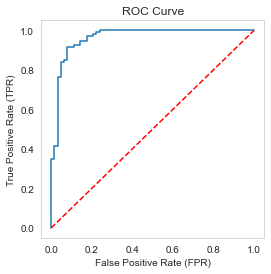

In [23]:
# plot ROC curve after train and test data 

from sklearn.metrics import roc_curve, auc
%matplotlib inline

# (Lower left)
ll = [0,1]

# (Upper rigth)
ur = [0,1]

plt.figure(figsize=(4,4))
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr, tpr)

# กำหนดสี
plt.plot(ll, ur, '--r') 

plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(False)
plt.show()

In [24]:
# count area(AUC) under ROC curve, for this performance of this area is 96.34%

auc = auc(fpr, tpr)
auc

0.9634621144055106

* สรุป

less threshold(<= 0.5) will get high sentivity

ค่า threshold ต่ำ = sentivity(ความไว) สูง 

ตรวจจับผล Positive ง่ายขึ้น คือจะชัวร์มากๆในการให้ผลที่เป็น Positive แต่ก็ทำให้ความผิดพลาด(FP) ก็จะสูงขึ้นด้วย